Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
## changed account to re mount drive and re model and train

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
##### DATA READIN AND DATA UNDERSTANDING
## Todo: Update the paths of the train and test dataset
## Done by updating path to google colab directory /content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration
##
path = "/content/drive/MyDrive/Data"
##train = /content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test
data_dir_train = pathlib.Path("/content/drive/MyDrive/Data/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Data/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2299
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.
### Created train & validation dataset from the train directory with a batch size of 32 .Resized images to 180*180.(10%)

### Create a dataset

### DATA SET CREATION
Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.within Train data set
Test data set is seperate

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## train_ds = todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2299 files belonging to 9 classes.
Using 1840 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##val_ds = ##todo
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2299 files belonging to 9 classes.
Using 459 files for validation.


In [9]:

## TEST dataset here
##test_ds
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
### DATASET VISUALIZATION
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

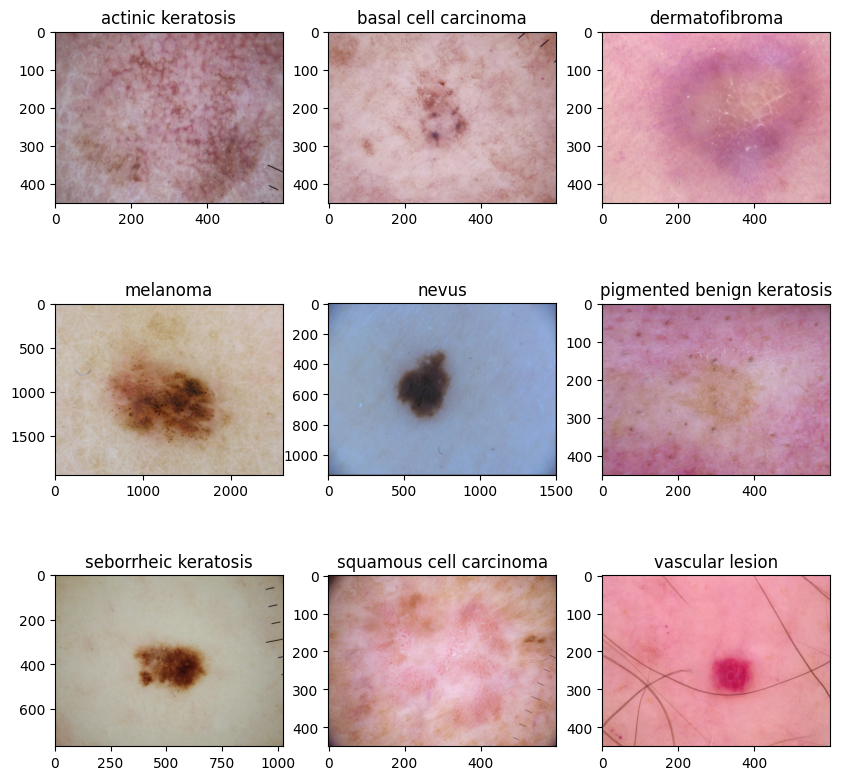

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img

### your code goes here, you can use training or validation data to visualize
## Visualizing using  train data set
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Model Building & training**





### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

### num calss = 9
### To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(keras.layers.Conv2D(32, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(64, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())


model.add(keras.layers.Conv2D(256, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(512, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dense(units=num_classes, activation= 'softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
### Todo, choose an appropirate optimiser and loss function
### Defined appropriate Adam optimiser and loss function for model training.
### learning rate is taken as .001 default

###model.compile(optimizer='your_optimser',
   ###           loss=your_loss_function_goes_here,
      ###        metrics=['accuracy'])
from tensorflow.keras.losses import SparseCategoricalCrossentropy
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Train the model

#### Epoch size 20 to train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 [==============================] - 601s 6s/step - loss: 2.0203 - accuracy: 0.2228 - val_loss: 1.7598 - val_accuracy: 0.3595
Epoch 2/20
58/58 [==============================] - 265s 5s/step - loss: 1.7365 - accuracy: 0.3668 - val_loss: 1.6547 - val_accuracy: 0.3834
Epoch 3/20
58/58 [==============================] - 257s 4s/step - loss: 1.6157 - accuracy: 0.4201 - val_loss: 1.6316 - val_accuracy: 0.4031
Epoch 4/20
58/58 [==============================] - 276s 5s/step - loss: 1.5408 - accuracy: 0.4522 - val_loss: 1.5020 - val_accuracy: 0.4553
Epoch 5/20
58/58 [==============================] - 268s 5s/step - loss: 1.4380 - accuracy: 0.4832 - val_loss: 1.4012 - val_accuracy: 0.4728
Epoch 6/20
58/58 [==============================] - 279s 5s/step - loss: 1.4200 - accuracy: 0.4908 - val_loss: 1.4007 - val_accuracy: 0.5033
Epoch 7/20
58/58 [==============================] - 268s 5s/step - loss: 1.3673 - accuracy: 0.5158 - val_loss: 1.4270 - val_accuracy: 0.4989
Epoch 8/20
58/58 [======

### Visualizing training results

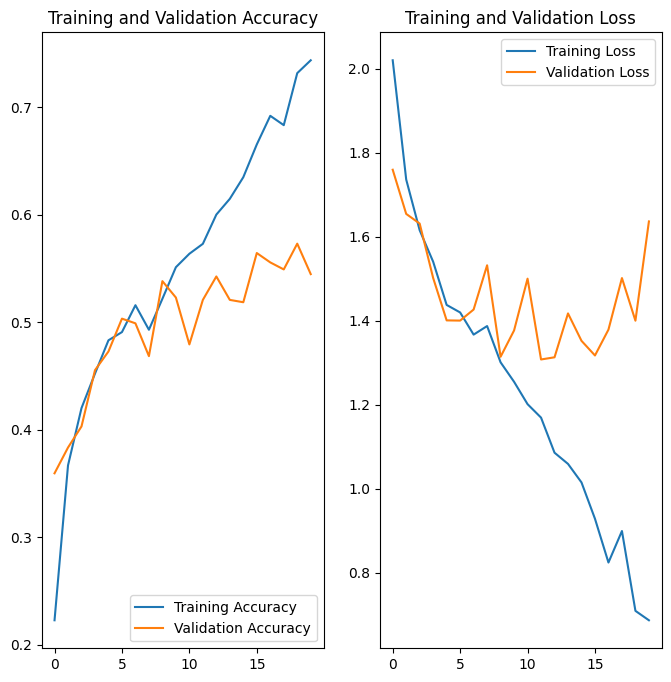

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

## This is very poor training Accuracy around 71%
## Model is over fit as difference between TRaining and Validation accuracy is evident and gap is around 18%
## Lot of imbalance can be observed over here
## model is over Fitting

### Data augmentation

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
## Using Data Augmentation and add drop out layer
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [ ]:
# Data visualization post

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Repeat steps for modelling , optimization using Adam

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## Repeat the model creation with drop 0ut
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(keras.layers.Conv2D(32, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(64, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Conv2D(256, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(512, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.30))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dense(units=num_classes, activation= 'softmax'))


### Compiling the model again

In [18]:
## Your code goes here
## USE ADAM Optimizer
#from tensorflow.keras.losses import SparseCategoricalCrossentropy
opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model again with 20 epochs

In [19]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 [==============================] - 368s 6s/step - loss: 2.0990 - accuracy: 0.1897 - val_loss: 2.0509 - val_accuracy: 0.1765
Epoch 2/20
58/58 [==============================] - 219s 4s/step - loss: 2.0344 - accuracy: 0.1967 - val_loss: 2.0155 - val_accuracy: 0.2789
Epoch 3/20
58/58 [==============================] - 212s 4s/step - loss: 1.9276 - accuracy: 0.2668 - val_loss: 1.7748 - val_accuracy: 0.3137
Epoch 4/20
58/58 [==============================] - 220s 4s/step - loss: 1.8035 - accuracy: 0.3440 - val_loss: 1.7143 - val_accuracy: 0.3486
Epoch 5/20
58/58 [==============================] - 228s 4s/step - loss: 1.6884 - accuracy: 0.3951 - val_loss: 1.7007 - val_accuracy: 0.3747
Epoch 6/20
58/58 [==============================] - 220s 4s/step - loss: 1.6209 - accuracy: 0.4201 - val_loss: 1.5760 - val_accuracy: 0.4139
Epoch 7/20
58/58 [==============================] - 226s 4s/step - loss: 1.5557 - accuracy: 0.4554 - val_loss: 1.4776 - val_accuracy: 0.4510
Epoch 8/20
58/58 [======

### Visualizing the results

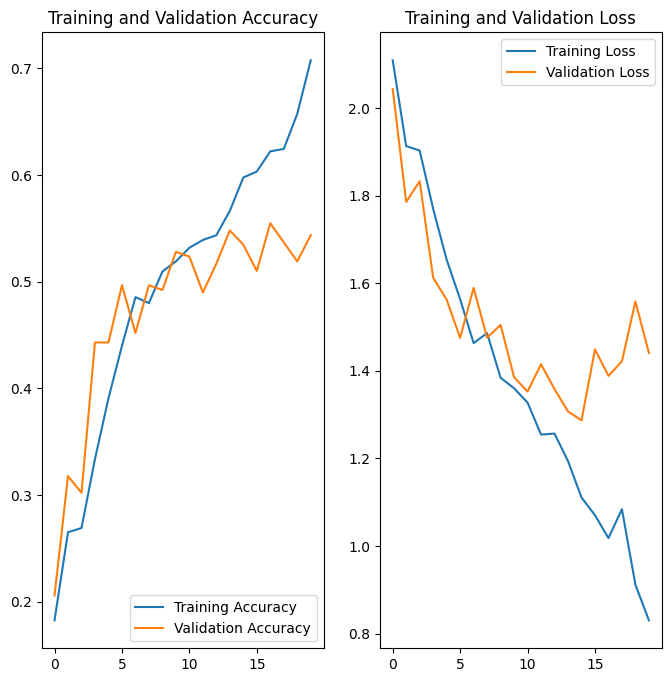

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Yes there is improvement in training vs validation and can see its reduced to certain degree

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

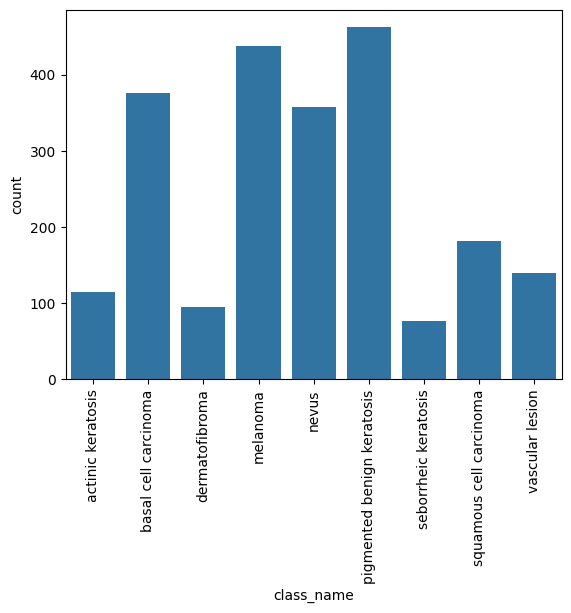

In [ ]:
## Your code goes here.
import seaborn as sns
num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### -  dermatfibroma is lowest
#### - Which classes dominate the data in terms proportionate number of samples?
#### -  pigmented benign keratone , melanome are high


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [20]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [22]:
#path = "/content/drive/MyDrive/Data"
path_to_training_dataset = pathlib.Path("/content/drive/MyDrive/Data/Train")
output_dir = pathlib.Path("/content/drive/MyDrive/Data/output")
import Augmentor
for i in class_names:
    #p = Augmentor.Pipeline(str(path_to_training_dataset / i))
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), str(output_dir / i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/actinic keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD29C38C250>: 100%|██████████| 500/500 [00:23<00:00, 21.36 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD29C16EDA0>: 100%|██████████| 500/500 [00:22<00:00, 22.16 Samples/s]


Initialised with 125 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD29C1358D0>: 100%|██████████| 500/500 [00:23<00:00, 21.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD29C15E710>: 100%|██████████| 500/500 [01:36<00:00,  5.16 Samples/s]


Initialised with 358 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7FD29C33FA60>: 100%|██████████| 500/500 [01:48<00:00,  4.61 Samples/s]


Initialised with 481 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD29C33FA90>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/seborrheic keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD27ACCDE70>: 100%|██████████| 500/500 [00:45<00:00, 11.07 Samples/s]


Initialised with 191 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD29E91E980>: 100%|██████████| 500/500 [00:23<00:00, 21.40 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Data/output/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD29C53C5B0>: 100%|██████████| 500/500 [00:23<00:00, 20.94 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
#import glob

#data_dir_train = pathlib.Path(data_dir_train)
#image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
#print(image_count_train)

#output_dir = pathlib.Path(("/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/output"))
output_dir1 = pathlib.Path("/content/drive/MyDrive/Data/output/")

image_count_train2 = len(list(output_dir1.glob('*/*.jpg')))
print(image_count_train2)


4500


In [ ]:
!pip install glob2

total training image count = 4500 

-------------------------------------
Class name =  actinic keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  500
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  500
proportion =  0.1111111111111111

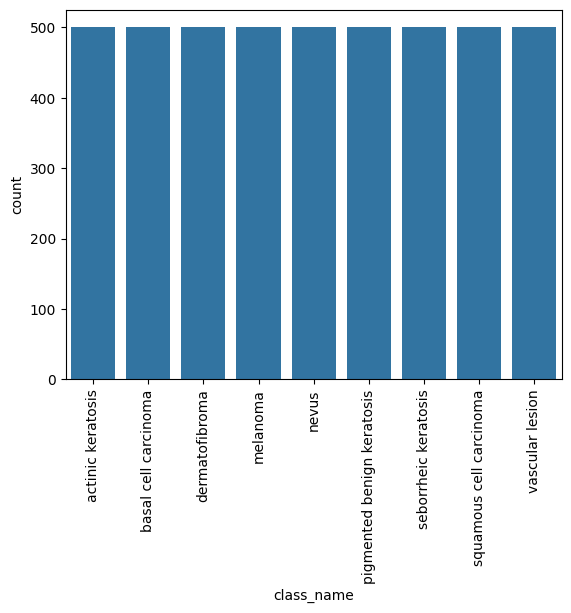

In [36]:
import seaborn as sns

num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir1.glob(class_names[i]+'*/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir1.glob(class_names[i]+'*/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

### Lets see the distribution of augmented data after adding new images to the original training data.

In [38]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, output_dir1, '*/*.jpg'))]
path_list

['/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0029840.jpg_311698ac-5cca-41e6-b72f-4f14d0e86dca.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0033705.jpg_eb641239-5c84-4b4f-8fe8-5c061cb6d5e8.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0025803.jpg_a0ec14cb-2e5a-4fb9-9b82-8f6d670f2742.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0030491.jpg_5aeddc6b-d504-4994-a1d1-07193d0ed15d.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0032437.jpg_bb441622-9ed3-450a-bb37-a0988bcdadd1.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0026702.jpg_891f4867-9880-43eb-a6ec-0db58970dfb3.jpg',
 '/content/drive/MyDrive/Data/output/actinic keratosis/actinic keratosis_original_ISIC_0032199.jpg_13387354-9a32-41c4-9bbc-8d578d8afef4.jpg',
 '/con

In [39]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, output_dir1, '*/*.jpg'))]
lesion_list_new

['output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',
 'output',

In [ ]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

path_list_new = "/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration"
dataframe_dict_new = {"path": path_list_new, "lesion": lesion_list_new}


In [ ]:
import pandas as pd
original_df = pd.DataFrame()
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-49-59912b37a655>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

/content/drive/MyDrive/Colab Notebooks/Data/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
#data_dir_train= output_dir
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir1,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(keras.layers.Conv2D(32, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(64, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(128, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Conv2D(256, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(512, 3,padding="same",activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dense(units=num_classes, activation= 'softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
##epochs = 30
## Your code goes here, use 30 epochs. I know its asked for 30 epochs but i dont have GPU to train it its taking more than 2 hour to trin it
#history = # your model fit code
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 29/113 [======>.......................] - ETA: 5:37 - loss: 2.0299 - accuracy: 0.1929

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

In [ ]:
##After rebalance/resampling of the data (that gave equal proportion of data )it should have definitely raised the accuray of the mdoel to 90%. This addressed the low accurty problem.

##overfitting probelm is adressed and now difference between train and val set should be very less.

## with these results it's conclusive that current model with rebalanced data is the best model.